In [15]:
# Data manipulation kit
import pandas as pd
import numpy as np

# Machine learning kit
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, silhouette_samples


# Plotting kit
import matplotlib.pyplot as plt

In [2]:
# get the dataset
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Prepare the data

In [3]:
df.isna().sum() , df.shape

(CUST_ID                               0
 BALANCE                               0
 BALANCE_FREQUENCY                     0
 PURCHASES                             0
 ONEOFF_PURCHASES                      0
 INSTALLMENTS_PURCHASES                0
 CASH_ADVANCE                          0
 PURCHASES_FREQUENCY                   0
 ONEOFF_PURCHASES_FREQUENCY            0
 PURCHASES_INSTALLMENTS_FREQUENCY      0
 CASH_ADVANCE_FREQUENCY                0
 CASH_ADVANCE_TRX                      0
 PURCHASES_TRX                         0
 CREDIT_LIMIT                          1
 PAYMENTS                              0
 MINIMUM_PAYMENTS                    313
 PRC_FULL_PAYMENT                      0
 TENURE                                0
 dtype: int64, (8950, 18))

In [4]:
df.dropna(axis = 0, inplace = True)

In [5]:
df.isna().sum(), df.shape

(CUST_ID                             0
 BALANCE                             0
 BALANCE_FREQUENCY                   0
 PURCHASES                           0
 ONEOFF_PURCHASES                    0
 INSTALLMENTS_PURCHASES              0
 CASH_ADVANCE                        0
 PURCHASES_FREQUENCY                 0
 ONEOFF_PURCHASES_FREQUENCY          0
 PURCHASES_INSTALLMENTS_FREQUENCY    0
 CASH_ADVANCE_FREQUENCY              0
 CASH_ADVANCE_TRX                    0
 PURCHASES_TRX                       0
 CREDIT_LIMIT                        0
 PAYMENTS                            0
 MINIMUM_PAYMENTS                    0
 PRC_FULL_PAYMENT                    0
 TENURE                              0
 dtype: int64, (8636, 18))

In [6]:
X = df.drop(columns = 'CUST_ID')

In [7]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


## K means clustering

In [8]:
# call the model and fit it on training data
k_clf = KMeans(n_clusters = 3, random_state = 0)
k_clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [9]:
k_clf.labels_

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

## Elbow Method for the best K

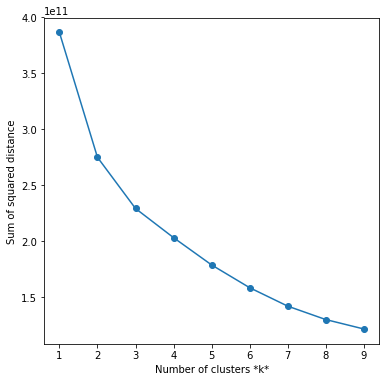

In [11]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

## Get the best n_clusters by GridSearchCV

In [ ]:
params = {'n_clusters':[3, 5, 8, 11], 'algorithm': ['auto', 'full', 'elkan'], 'n_init':[10, 15, 20]}
model = KMeans()
clf = GridSearchCV(model, params, cv = 5)
clf.fit(X)

In [22]:
clf.best_params_

{'algorithm': 'full', 'n_clusters': 11, 'n_init': 20}

In [54]:
opt_clf = KMeans(n_clusters = 11, algorithm = 'full', n_init = 20)
opt_clf.fit(X_train, y_train)
opt_predicted = opt_clf.predict(X_test)
accuracy_score(y_test, opt_predicted)

0.35555555555555557

### we can see that our model with the new `best` parameters has done well by 27 percent  
### than the first `unoptimized one`  
### Although the accuracy is still too low!

## DBSCAN clustering algorithm

In [71]:
DB = DBSCAN(eps = 3, min_samples = 5).fit(X)

In [72]:
DB.labels_

array([-1, -1, -1, ..., -1, -1, -1])